In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tnrange
from tqdm.notebook import tqdm

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset = dataset.drop('stop_id', axis=1)
dataset.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Y_14,Y_15,Y_16,Y_17,Y_18,Y_19,Y_20,Y_21,Y_22,Y_23
0,2.831683,0.000000,0.0,0.0,0.0,4.930693,8.485149,10.455446,14.970297,14.495050,...,5.6,5.6,5.6,7.4,7.6,7.5,6.3,4.1,3.8,3.8
1,0.158416,1.782178,0.0,0.0,0.0,1.782178,4.990099,5.465347,9.683168,10.099010,...,3.1,3.1,3.1,3.7,4.2,4.3,3.8,2.4,1.9,1.9
2,1.465347,0.000000,0.0,0.0,0.0,3.009901,3.257426,4.356436,4.752475,6.178218,...,3.1,3.1,3.0,3.4,3.3,3.1,2.2,1.9,1.9,1.9
3,1.049505,0.891089,0.0,0.0,0.0,2.257426,5.465347,5.940594,10.099010,9.623762,...,3.1,3.1,3.1,3.9,4.2,4.3,3.5,2.3,1.8,1.9
4,0.891089,0.000000,0.0,0.0,0.0,3.564356,4.039604,6.297030,5.821782,5.821782,...,2.5,2.5,2.9,3.1,3.2,3.0,1.9,2.0,1.9,1.8


In [4]:
dataset.describe()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Y_14,Y_15,Y_16,Y_17,Y_18,Y_19,Y_20,Y_21,Y_22,Y_23
count,92.000000,92.000000,92.0,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,1.266358,0.467607,0.0,0.0,0.061343,2.521954,5.025613,6.523246,7.941778,7.558115,...,3.031522,3.044565,3.282609,3.857609,3.943478,3.808696,2.967391,2.231522,2.052174,2.070652
std,1.070601,0.604040,0.0,0.0,0.218174,1.894185,2.523899,3.514182,4.112703,3.744572,...,1.276235,1.275670,1.376619,1.841955,1.800812,1.812390,1.391663,0.934319,0.882613,0.885728
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.792079,0.792079,1.188119,2.138614,...,1.400000,1.400000,1.400000,1.400000,1.500000,1.100000,1.000000,0.900000,0.900000,0.900000
25%,0.306931,0.000000,0.0,0.0,0.000000,0.891089,3.215347,3.507426,4.871287,4.871287,...,2.500000,2.500000,2.500000,3.000000,3.200000,2.975000,2.200000,1.900000,1.800000,1.900000
50%,0.891089,0.000000,0.0,0.0,0.000000,2.455446,4.990099,6.148515,7.247525,6.772277,...,2.500000,2.500000,3.000000,3.400000,3.500000,3.400000,2.700000,2.000000,1.900000,1.900000
75%,2.257426,0.891089,0.0,0.0,0.000000,3.564356,5.940594,7.841584,9.311881,8.198020,...,3.100000,3.200000,3.600000,4.025000,4.125000,4.025000,3.500000,2.300000,1.925000,2.000000
max,4.039604,2.039604,0.0,0.0,0.861386,7.663366,11.405941,15.504950,17.346535,16.871287,...,5.600000,5.600000,6.500000,7.800000,7.600000,7.600000,6.300000,4.300000,3.900000,4.000000


In [5]:
def create_sets (dataset) :
    train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

    X_train = train_set.drop(['Y_0','Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_7', 'Y_8', 'Y_9', 'Y_10', 'Y_11','Y_12',
                              'Y_13','Y_14', 'Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19', 'Y_20', 'Y_21', 'Y_22', 'Y_23'], axis=1)
    
    Y_train = train_set.drop(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11','X_12',
                              'X_13','X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23'], axis=1)

    
    X_test = test_set.drop(['Y_0','Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_7', 'Y_8', 'Y_9', 'Y_10', 'Y_11','Y_12',
                              'Y_13','Y_14', 'Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19', 'Y_20', 'Y_21', 'Y_22', 'Y_23'], axis=1)
    
    Y_test = test_set.drop(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11','X_12',
                              'X_13','X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23'], axis=1)

    return (train_set, test_set, X_train, Y_train, X_test, Y_test)

In [6]:
(train_set, test_set, X_train, Y_train, X_test, Y_test) = create_sets(dataset) 

In [7]:
X_train.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23
30,2.831683,0.000000,0.0,0.0,0.0,6.297030,8.554455,11.346535,14.970297,14.019802,...,9.267327,9.267327,9.267327,11.643564,12.118812,11.643564,8.495050,5.702970,5.346535,5.702970
41,2.831683,0.000000,0.0,0.0,0.0,7.188119,8.326733,12.297030,14.970297,13.544554,...,9.267327,9.267327,9.267327,11.643564,12.118812,11.643564,8.495050,5.227723,5.465347,5.702970
54,0.891089,0.891089,0.0,0.0,0.0,0.891089,4.039604,5.465347,7.247525,7.247525,...,5.346535,5.346535,5.346535,6.772277,6.772277,7.247525,5.881188,4.514851,3.564356,3.564356
6,0.000000,0.891089,0.0,0.0,0.0,0.000000,3.564356,3.336634,4.871287,4.871287,...,2.495050,2.495050,2.495050,2.495050,2.495050,2.495050,2.970297,2.138614,1.663366,2.019802
43,1.782178,0.000000,0.0,0.0,0.0,4.039604,5.940594,7.247525,7.247525,5.821782,...,5.346535,5.346535,6.297030,7.247525,7.247525,4.930693,4.514851,3.564356,3.564356,3.564356


In [8]:
Y_train.head()

,Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,...,Y_14,Y_15,Y_16,Y_17,Y_18,Y_19,Y_20,Y_21,Y_22,Y_23
30,1.6,0.0,0.0,0.0,0.0,3.4,5.1,6.5,7.9,7.4,...,5.6,5.6,5.7,7.8,7.5,7.5,5.6,4.1,3.8,3.8
41,1.6,0.0,0.0,0.0,0.0,3.9,5.2,6.7,7.9,7.2,...,5.6,5.6,5.9,7.7,7.5,7.3,5.6,3.9,3.9,3.8
54,0.5,0.5,0.0,0.0,0.0,1.0,2.2,2.9,3.6,3.6,...,2.5,2.5,2.7,3.4,3.4,3.6,3.1,2.2,1.9,1.9
6,0.1,0.5,0.0,0.0,0.0,0.0,2.3,2.5,3.4,3.5,...,2.5,2.5,2.5,2.9,3.4,3.2,3.3,2.2,1.9,1.9
43,1.0,0.0,0.0,0.0,0.0,2.2,2.8,3.4,3.4,2.8,...,2.5,2.5,3.0,3.3,3.4,2.6,2.2,1.9,1.9,1.9


In [9]:
Y_train.describe()

,Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,...,Y_14,Y_15,Y_16,Y_17,Y_18,Y_19,Y_20,Y_21,Y_22,Y_23
count,73.000000,73.000000,73.0,73.0,73.000000,73.000000,73.000000,73.00000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.687671,0.306849,0.0,0.0,0.041096,1.323288,2.675342,3.30411,3.963014,3.769863,...,2.953425,2.965753,3.195890,3.752055,3.856164,3.734247,2.920548,2.186301,2.008219,2.012329
std,0.595806,0.365273,0.0,0.0,0.138279,1.029633,1.289248,1.63821,1.906750,1.834521,...,1.278028,1.278912,1.377945,1.847529,1.801464,1.824845,1.406528,0.946091,0.891434,0.886777
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.20000,1.300000,1.400000,...,1.400000,1.400000,1.400000,1.400000,1.500000,1.100000,1.000000,0.900000,0.900000,0.900000
25%,0.100000,0.000000,0.0,0.0,0.000000,0.500000,2.000000,2.50000,3.100000,2.700000,...,2.500000,2.500000,2.500000,2.900000,3.200000,2.900000,2.200000,1.800000,1.800000,1.800000
50%,0.500000,0.000000,0.0,0.0,0.000000,1.000000,2.400000,2.90000,3.500000,3.500000,...,2.500000,2.500000,3.000000,3.300000,3.500000,3.400000,2.700000,2.000000,1.900000,1.900000
75%,1.300000,0.500000,0.0,0.0,0.000000,2.000000,2.900000,3.80000,4.300000,3.900000,...,3.100000,3.200000,3.600000,3.900000,4.200000,4.000000,3.300000,2.300000,2.000000,2.000000
max,2.300000,1.300000,0.0,0.0,0.500000,4.400000,5.600000,7.10000,8.000000,7.900000,...,5.600000,5.600000,6.400000,7.800000,7.600000,7.600000,6.300000,4.300000,3.900000,3.800000


In [17]:
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor

In [11]:
def courbe_apprentissage(model,X,Y) :
    
    N, train_score, val_score = learning_curve(model, X, Y,
                                              cv=5, scoring='neg_root_mean_squared_error',
                                               train_sizes=[0.005, 0.01, 0.1, 0.3, 0.6, 0.8, 1])
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N/len(X_train)*100, -train_score.mean(axis=1), label='train score')
    plt.plot(N/len(X_train)*100, -val_score.mean(axis=1), label='validation score')
    plt.legend()

C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 6 instead of 7).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


temps d'exécution : 3.7401347160339355


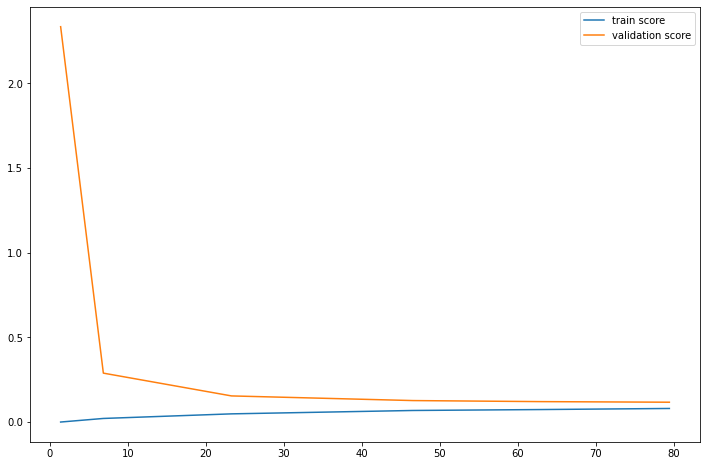

In [26]:
debut = time.time()

data = dataset.copy()

train_set, test_set, X_train, y_train, X_test, y_test = create_sets(data)

model = MultiOutputRegressor(Ridge(random_state=0))
model.fit(X_train, y_train)
courbe_apprentissage(model, X_train, y_train)

fin = time.time()
duree = fin-debut
print("temps d'exécution :", duree)

C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 6 instead of 7).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


temps d'exécution : 1.7214891910552979


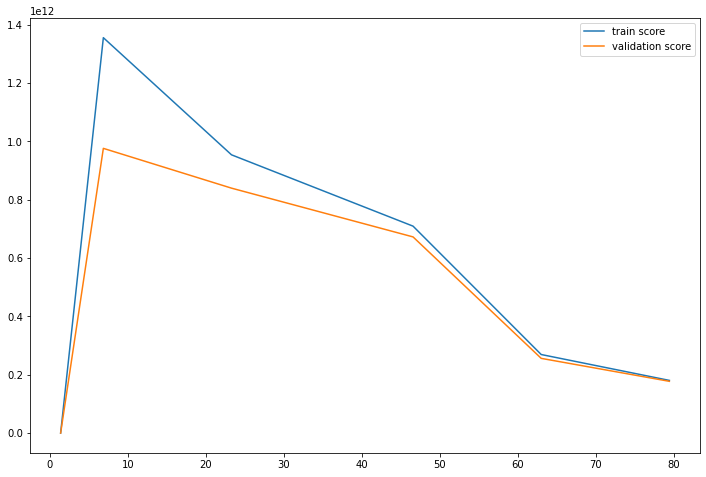

In [18]:
debut = time.time()

data = dataset.copy()

train_set, test_set, X_train, y_train, X_test, y_test = create_sets(data)

model = MultiOutputRegressor(SGDRegressor())
model.fit(X_train, y_train)
courbe_apprentissage(model, X_train, y_train)

fin = time.time()
duree = fin-debut
print("temps d'exécution :", duree)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
MultiOutputRegressor(SGDRegressor()).get_params().keys()

dict_keys(['estimator__alpha', 'estimator__average', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__eta0', 'estimator__fit_intercept', 'estimator__l1_ratio', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_iter', 'estimator__n_iter_no_change', 'estimator__penalty', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 6 instead of 7).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "

temps d'exécution : 510.90297269821167


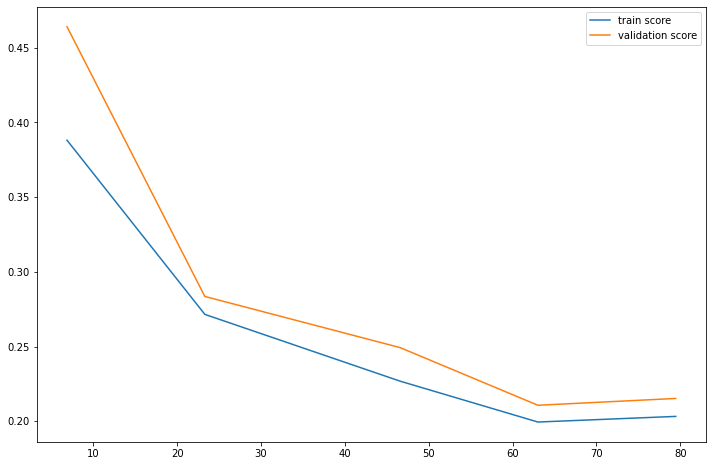

In [29]:
debut = time.time()

data = dataset.copy()

train_set, test_set, X_train, y_train, X_test, y_test = create_sets(data)

hyper_params={'estimator__loss' : ['squared_loss', 'huber', 'epsilon_insensitive'],
              'estimator__penalty' : ['l2','l1','elasticnet'],
              'estimator__alpha' : [0.00005,0.0001, 0.001, 0.01, 0.1],
              'estimator__epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'estimator__max_iter' : [50000]
             }


model = RandomizedSearchCV(MultiOutputRegressor(SGDRegressor()), param_distributions=hyper_params, n_iter=100,
                                        scoring='neg_root_mean_squared_error', cv=5)


model.fit(X_train, y_train)
courbe_apprentissage(model, X_train, y_train)

fin = time.time()
duree = fin-debut
print("temps d'exécution :", duree)

In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 6 instead of 7).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


temps d'exécution : 9.064304828643799


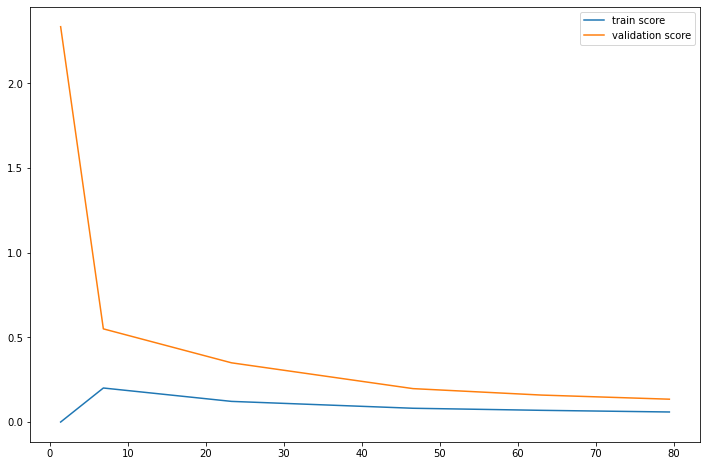

In [14]:
debut = time.time()

data = dataset.copy()

train_set, test_set, X_train, y_train, X_test, y_test = create_sets(data)

model = RandomForestRegressor()
model.fit(X_train, y_train)
courbe_apprentissage(model, X_train, y_train)

fin = time.time()
duree = fin-debut
print("temps d'exécution :", duree)